In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import platform

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

# 운영체제별 한글 폰트 설정
if platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

# Warning 제거
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 
warnings.simplefilter(action='ignore', category=UserWarning)  
pd.set_option('mode.chained_assignment',  None)   
#pd.set_option('mode.chained_assignment', 'warn')

In [147]:
sample_df = pd.read_csv(r'data\sample_submission.csv')
test_df = pd.read_csv(r'data\test.csv')
train_df = pd.read_csv(r'data\train.csv')

In [148]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2207 entries, 0 to 2206
Columns: 184 entries, ID to 2022-11-28 엽록소
dtypes: float64(182), int64(1), object(1)
memory usage: 3.1+ MB


In [149]:
x_train = train_df.drop(['ID','착과량(int)'],axis=1)
y_train = train_df['착과량(int)']
test = test_df.drop(['ID'],axis=1)

In [150]:
X = x_train
Y = y_train

x_tr, x_te, y_tr, y_te = train_test_split(X,Y, test_size = 0.3, random_state=3)

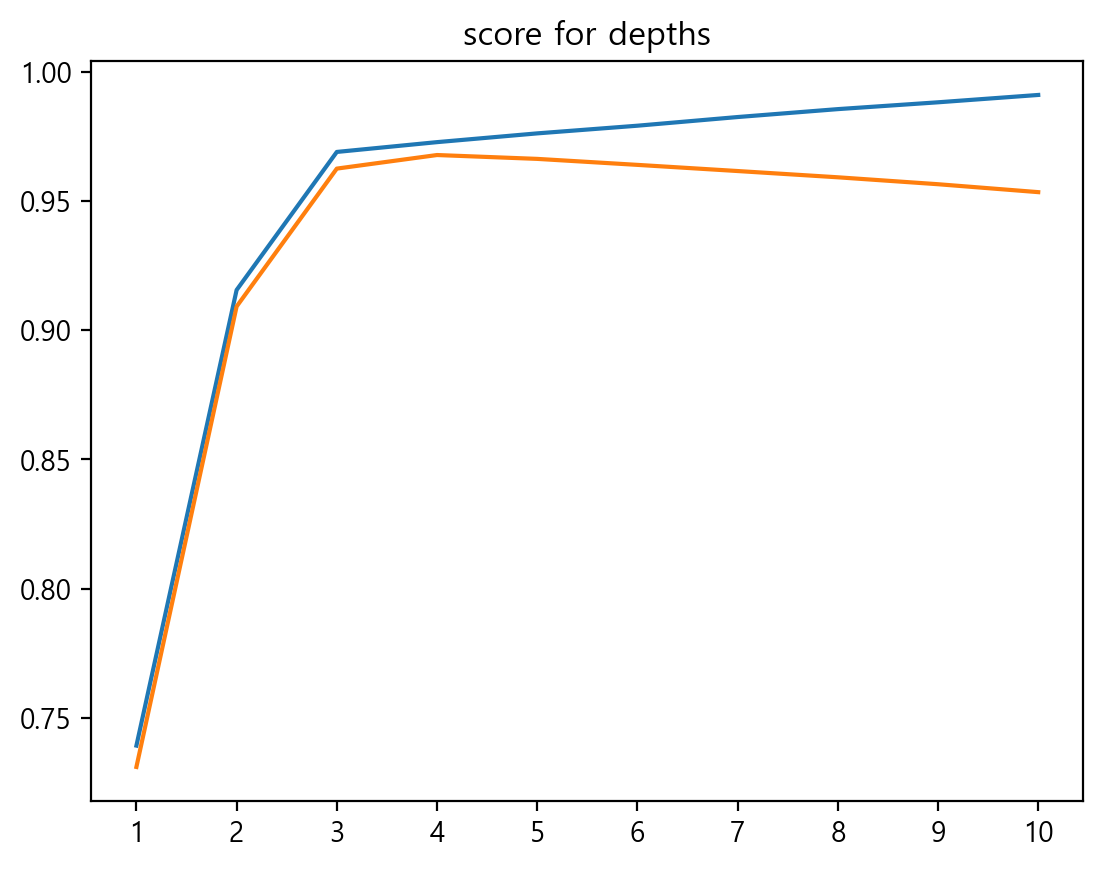

In [151]:
train_score=[]
test_score=[]
for i in range(1,11):
    model=DecisionTreeRegressor(max_depth=i,random_state=4)
    model.fit(x_tr,y_tr)
    train_score.append(model.score(x_tr,y_tr))
    test_score.append(model.score(x_te,y_te))
plt.figure()
plt.title('score for depths')
plt.plot(range(1,11),train_score)
plt.plot(range(1,11),test_score)
plt.xticks(range(1,11))
plt.show()

In [152]:
model = DecisionTreeRegressor(max_depth=4)
model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=4)

In [153]:
train_accuracy = model.score(x_train, y_train)
print(f'훈련 정확도는 : {train_accuracy} 입니다.')

훈련 정확도는 : 0.9720107184123788 입니다.


In [154]:
test_pred = model.predict(test)

In [155]:
test_pred

array([248.29391892, 753.98947368, 152.        , ..., 353.06405694,
       248.29391892,  96.72222222])

In [156]:
sample_df['착과량(int)'] = test_pred

In [159]:
sample_df.to_csv('data/result.csv')